##### Отправляем сообщения только есть узел Активен (не блокирован)
##### узел считается свободным если очередь < L*0,5
MultiplierThresholdToBlock 50, FractionThresholdToUnBlock 0,5, UseOnlyIsActiveNodes True, NumberOfGenerations 120 <br>
<strong>Поток Quantity 100 </strong>

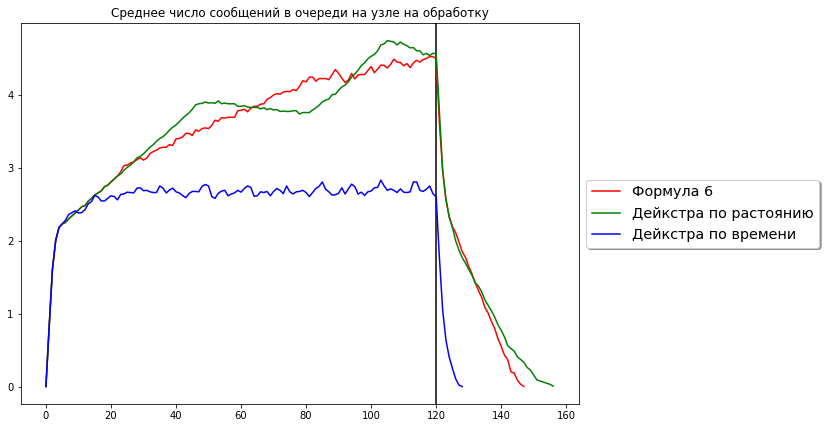

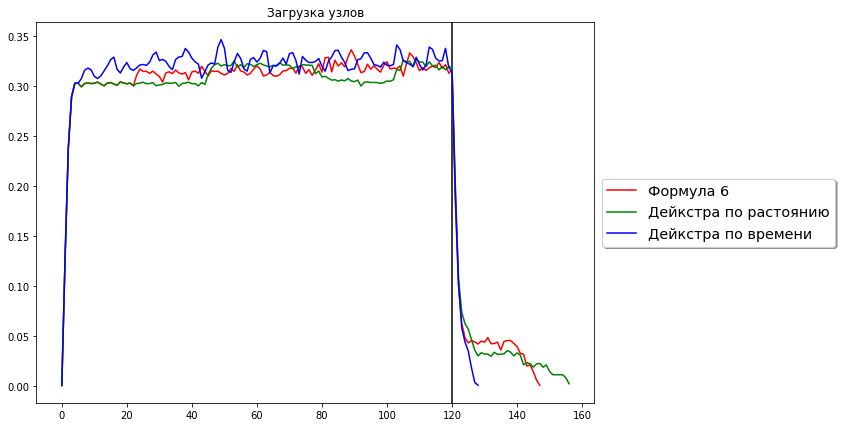

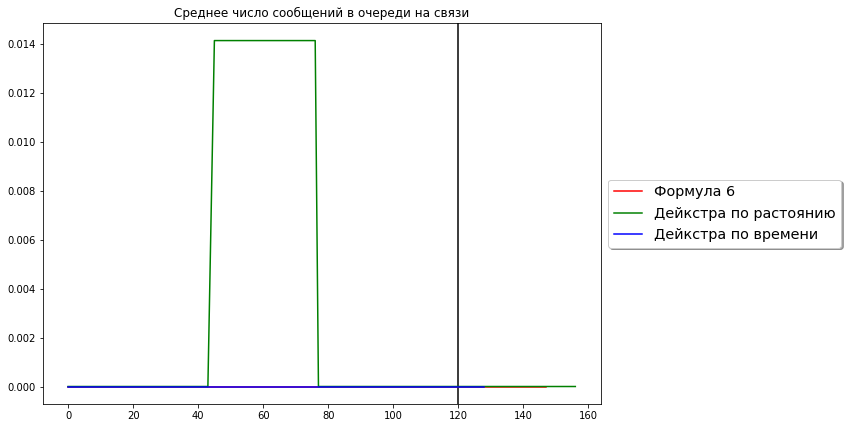

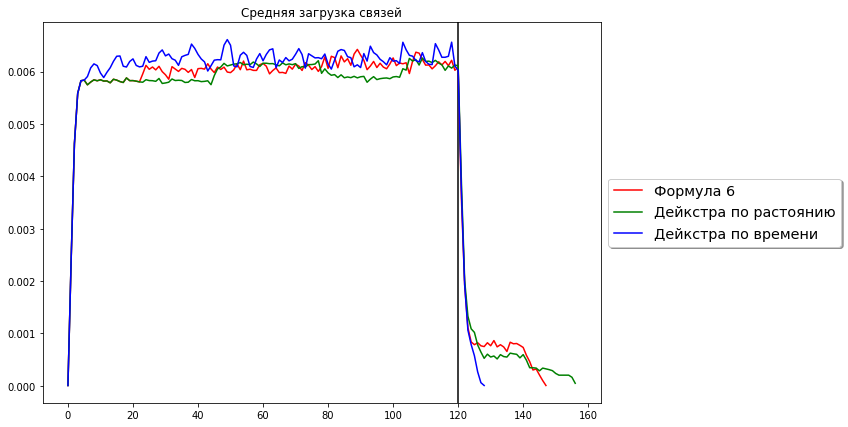

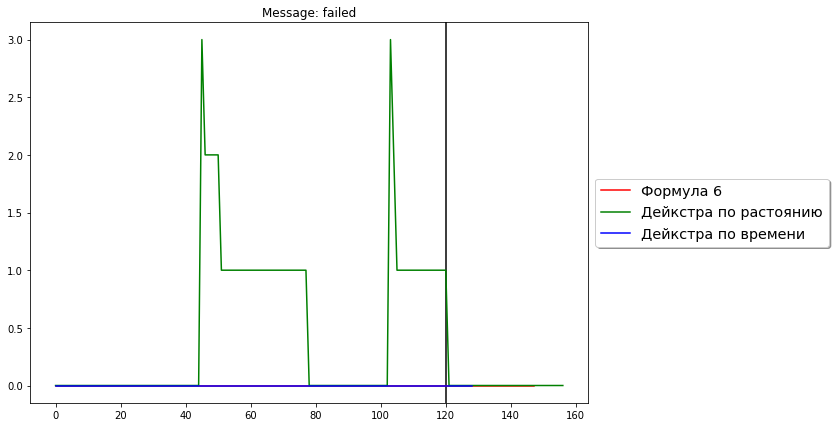

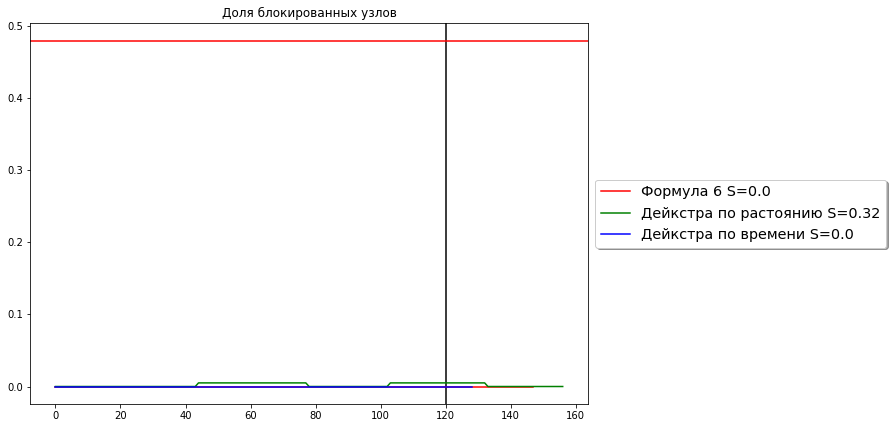

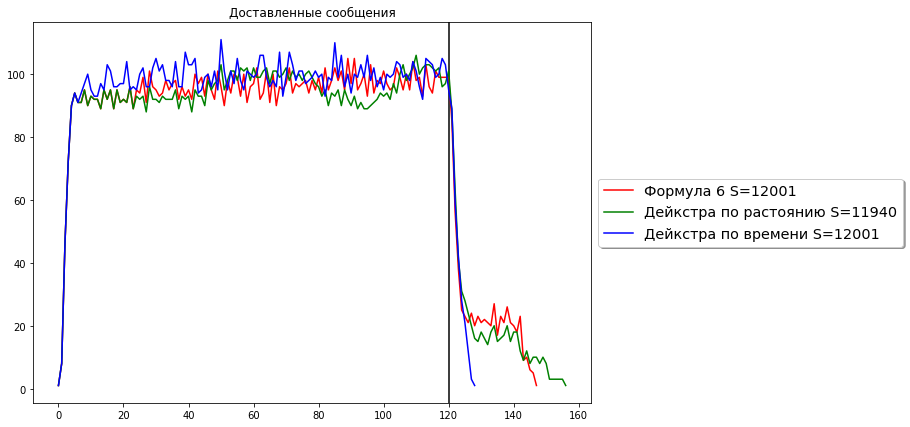

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import os
  
log_dir_path = os.path.abspath('..\\')+"\\Result"

log_tags = [
 {"tag":  "87b6663d-5504-4a8d-a11f-d29a666da143", "label": "Формула 6", "color": "red"},
 {"tag":  "bb3d5902-77ad-4410-87b3-ad05389238b0", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "ee10d6cd-2365-495a-8cba-94281f37e739", "label": "Дейкстра по времени", "color": "blue"},
 
]

files = [
    {"filename": "Netsim-Node-Metrics-queue-{log_tag}", "title": "Среднее число сообщений в очереди на узле на обработку" },
    {"filename": "Netsim-Node-Metrics-load-{log_tag}", "title": "Загрузка узлов" },
    {"filename": "Netsim-Connection-Metrics-queue-{log_tag}", "title": "Среднее число сообщений в очереди на связи"},
    {"filename": "Netsim-Connection-Metrics-load-{log_tag}", "title": "Средняя загрузка связей"},
    {"filename": "Netsim-Message-Metrics-failed-{log_tag}", "title": "Message: failed"},
]

filesBlocked = [
    {"filename": "Netsim-Node-Metrics-blocked-{log_tag}", "title": "Доля блокированных узлов" },
]

filesMessage = [
    {"filename": "Netsim-Message-Metrics-{log_tag}", "title": "Доставленные сообщения" },

]
          
def load_csv_file(path):
    file = open(path)
    data = file.readlines()
    splitted_data = [x.split(',') for x in data]
    return splitted_data, len(splitted_data[0])


def aggeregate_line(array):
    aggregated = [sum([float(y) for y in x])/len(x) for x in array]
    return aggregated, len(aggregated)


def plot(x, y, x2, y2, title):
    fig, ax = plt.subplots()
    ax.plot(x, y, label=title, c="blue")
    ax.plot(x2, y2, label=title, c="red")
    ax.set_title(title)
    plt.axvline(x=500, c="green")

def showStat():
    for file in files:
        fig, ax = plt.subplots()
        plt.rcParams['figure.figsize'] = [10, 7]
        ax.set_title(file['title'])
        plt.axvline(x=120, c="black")
       
        for log_tag in log_tags:
            data, line_len = load_csv_file(f"{log_dir_path}/{file['filename'].format(log_tag = log_tag['tag'])}")
            aggregated, count = aggeregate_line(data)
            ax.plot(range(0, count), aggregated, c=log_tag['color'], label=log_tag['label'])    
            legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
            legend.get_frame()
                                   
    plt.show()
                                           
def aggeregate_line_perc_node(array):
    aggregated = [sum([1 for y in x if float(y) > 0])/len(x) for x in array]
    return aggregated, len(aggregated)

def showStatBlocked():
    for file in filesBlocked:
        fig, ax = plt.subplots()
        plt.rcParams['figure.figsize'] = [10, 7]
        ax.set_title(file['title'])
        plt.axvline(x=120, c="black")
        plt.axhline(y=0.48, color='r', linestyle='-')
       
        for log_tag in log_tags:
            data, line_len = load_csv_file(f"{log_dir_path}/{file['filename'].format(log_tag = log_tag['tag'])}")
            aggregated, count = aggeregate_line_perc_node(data)
            summ = np.sum(aggregated)
            ax.plot(range(0, count), aggregated, c=log_tag['color'], label=log_tag['label']+' S='+str(summ))    
            legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
            legend.get_frame()


def str2bool(v):
    return v.lower() in ("yes", "true", "t", "1")

def load_csv_file_message(path):
    file = open(path)
    data = file.readlines()
    t = datetime(2021,6,1,1)
   
    splitted_data = [(str2bool(x.split(',')[-2]), (datetime.strptime(x.split(',')[-1], '%d.%m.%Y %H:%M:%S\n')-t).total_seconds())  for x in data]
    df = pd.DataFrame(data=splitted_data,  columns=['Resived', 'Time'])
    df = df.loc[df['Resived'] == True]
    agg= df.groupby(['Time']).count()
     
    return agg['Resived'].to_numpy(), agg.index.get_level_values(0).to_numpy()

def showStatMessage():
    for file in filesMessage:
        fig, ax = plt.subplots()
        plt.rcParams['figure.figsize'] = [10, 7]
        ax.set_title(file['title'])
        plt.axvline(x=120, c="black")
       
        for log_tag in log_tags:
            data, line_len = load_csv_file_message(f"{log_dir_path}/{file['filename'].format(log_tag = log_tag['tag'])}")
            summ = np.sum(data)
            ax.plot(line_len, data, c=log_tag['color'], label=log_tag['label']+' S='+str(summ))    
            legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
            legend.get_frame()
    plt.show()
      
                             
showStat()
showStatBlocked();  
showStatMessage(); 

<strong>Quantity 300 </strong>

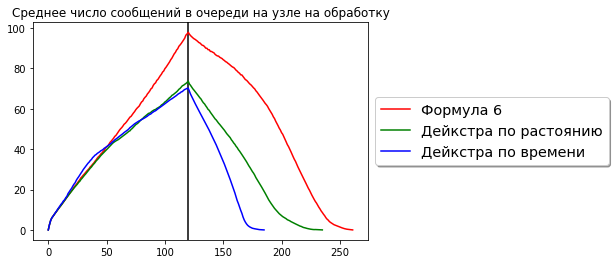

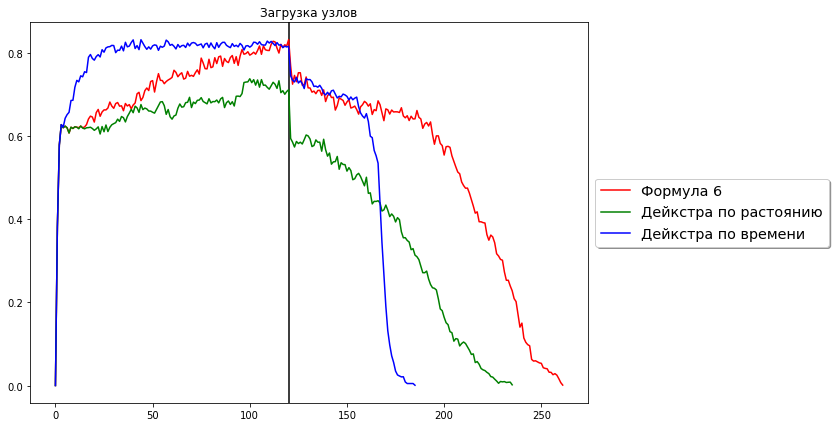

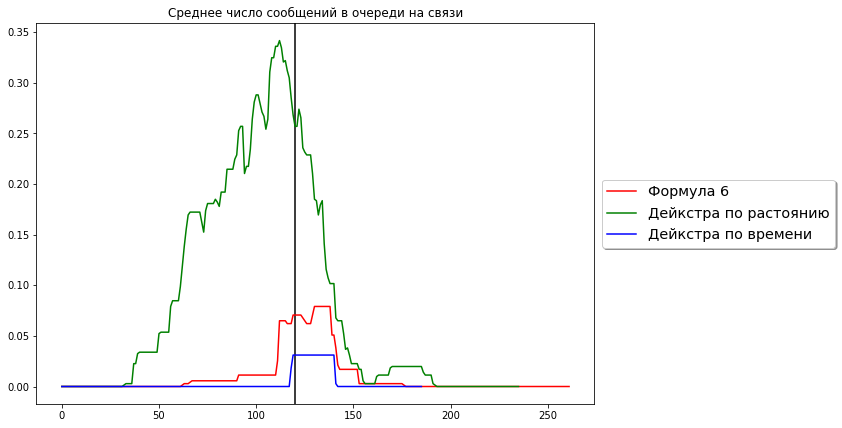

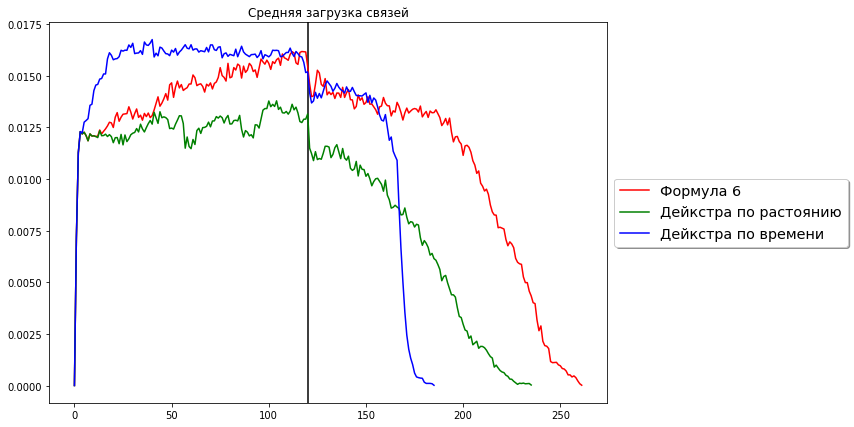

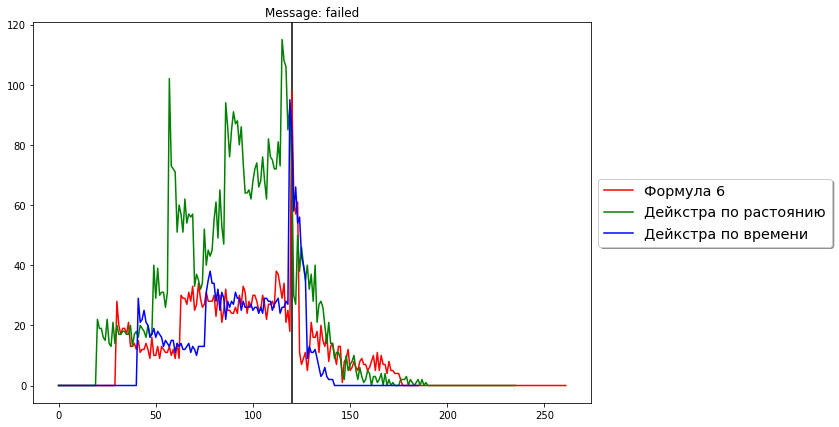

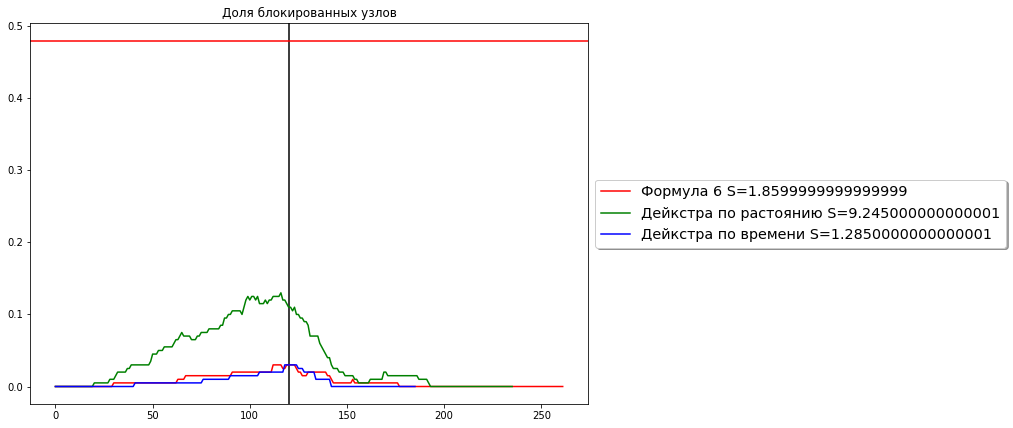

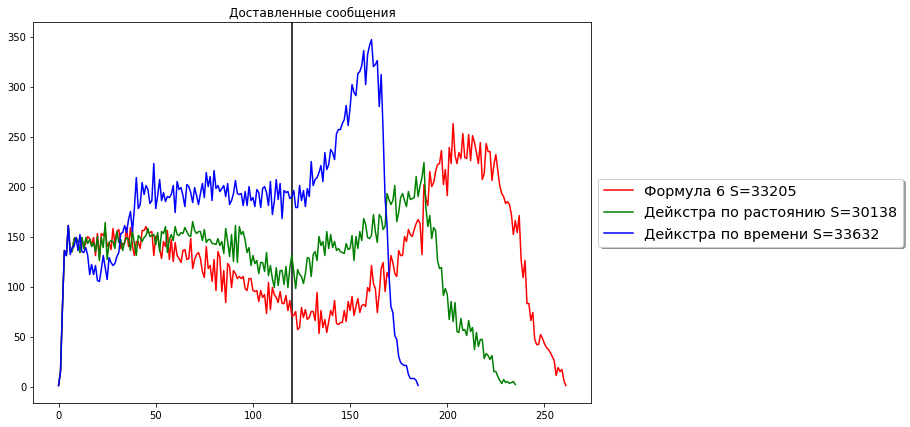

In [2]:
log_tags = [
 {"tag":  "2bcd652d-9e4b-4f7b-8725-c0fdb279cf03", "label": "Формула 6", "color": "red"},
 {"tag":  "df3dcd59-c866-4a4b-9eca-fd2f5b75d0a0", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "47a7cbb1-517e-4e78-b7ae-7efc32b7d6a4", "label": "Дейкстра по времени", "color": "blue"},
]
showStat()
showStatBlocked();  
showStatMessage(); 

<strong>Quantity 500 </strong>
 

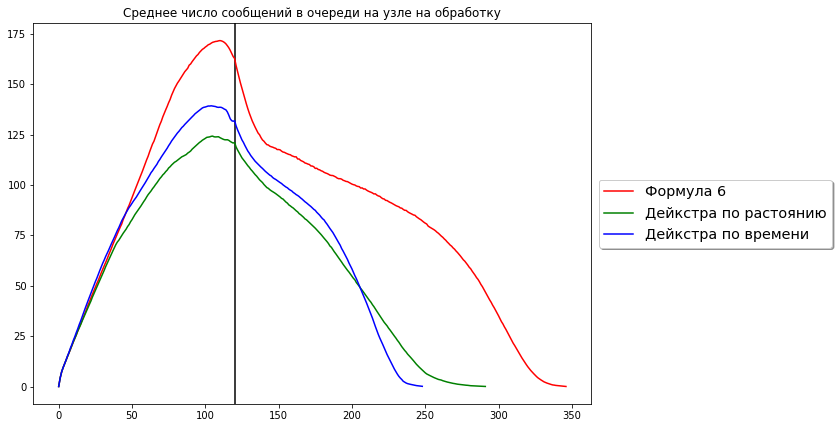

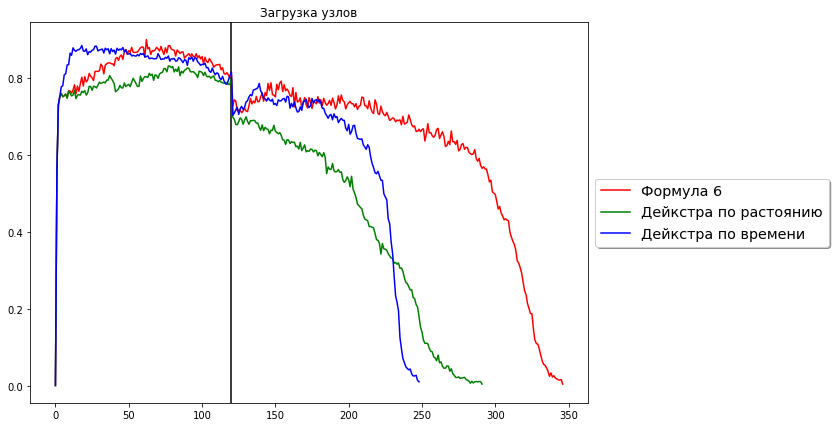

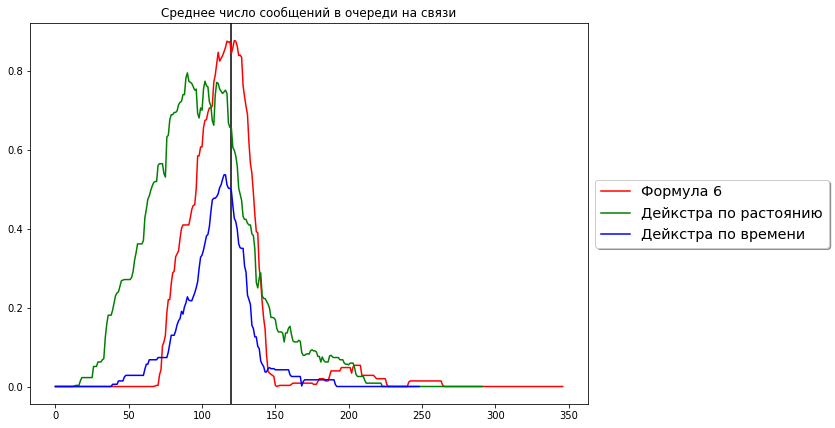

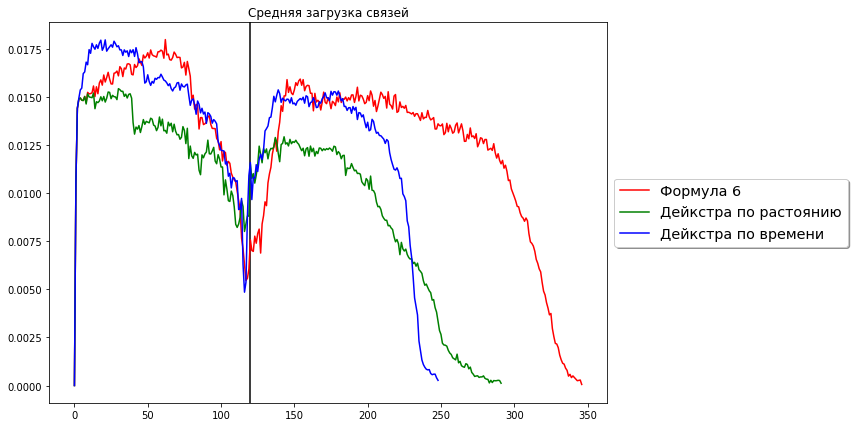

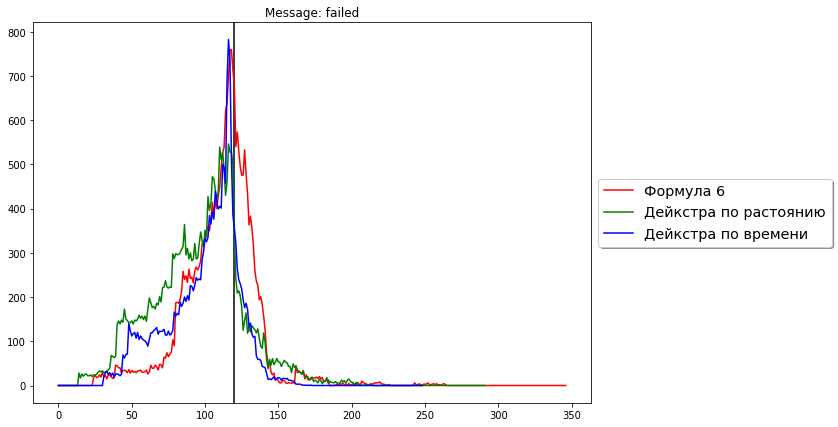

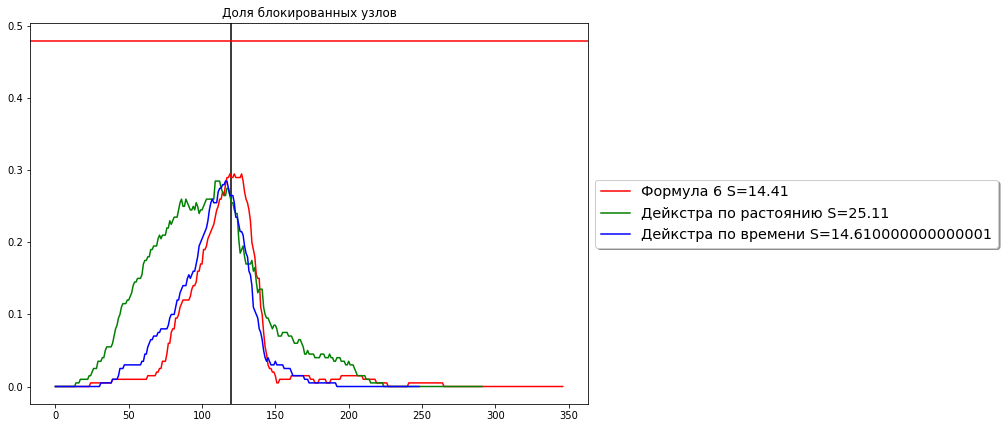

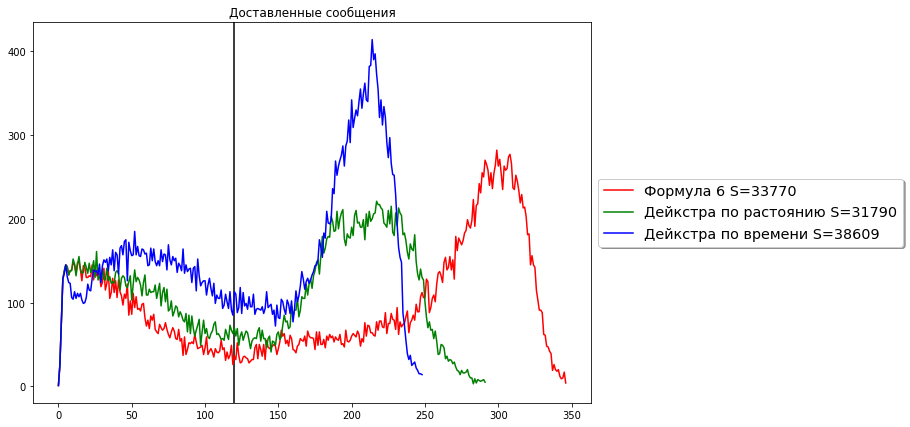

In [3]:
log_tags = [
 {"tag":  "5bf2082f-3e3e-4fad-98fd-7793deecdc21", "label": "Формула 6", "color": "red"},
 {"tag":  "45a0a87b-81c4-455f-ab0b-caa3a0ce38be", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "b549a43b-2e17-4b05-a7b7-8008e01ff37f", "label": "Дейкстра по времени", "color": "blue"},
]
showStat()
showStatBlocked();  
showStatMessage();

<strong>Quantity 1000 </strong>

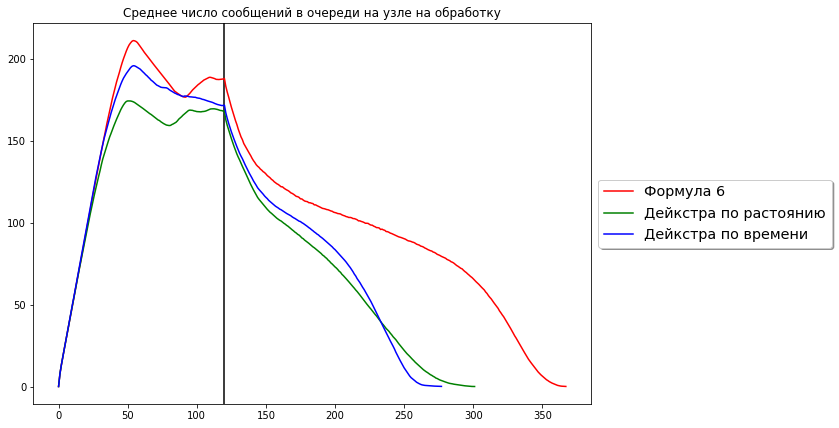

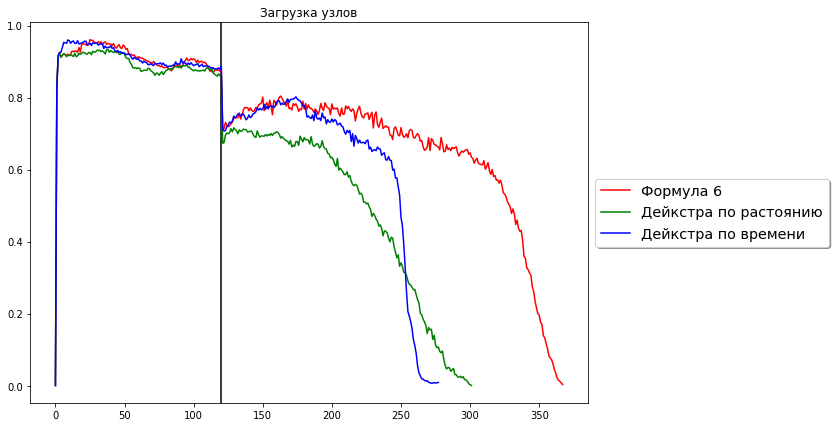

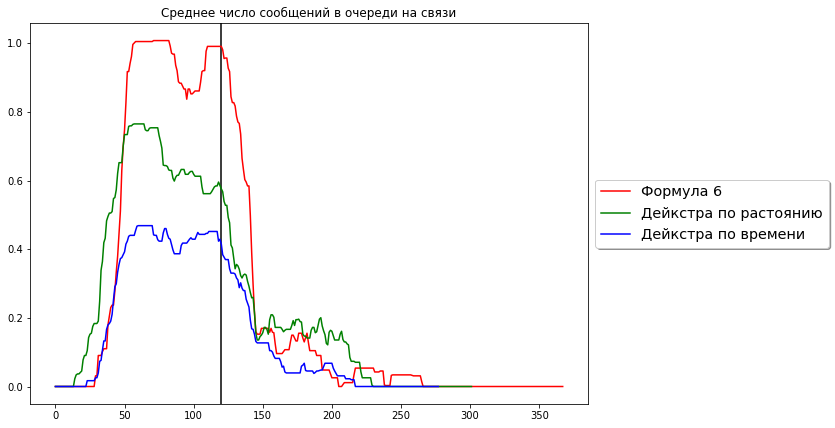

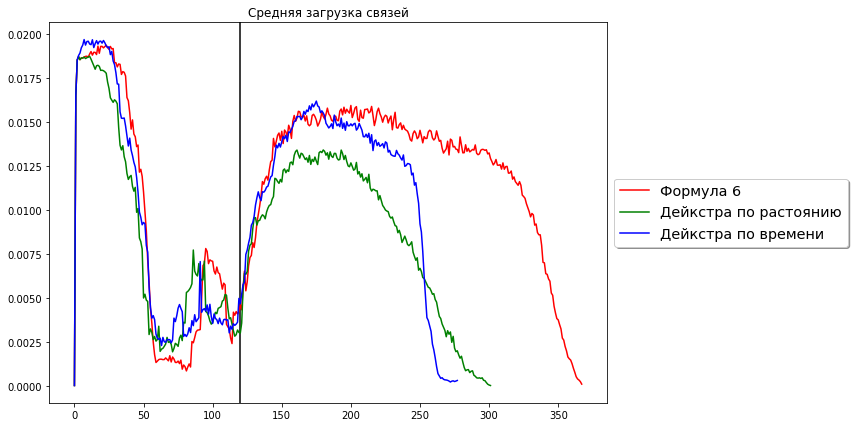

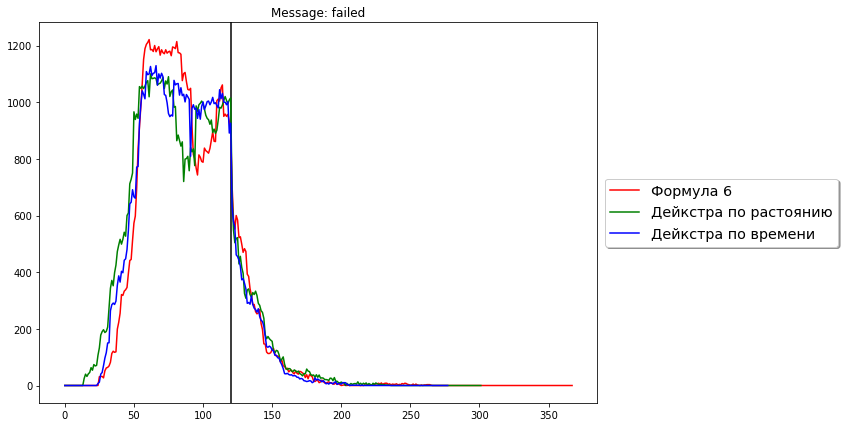

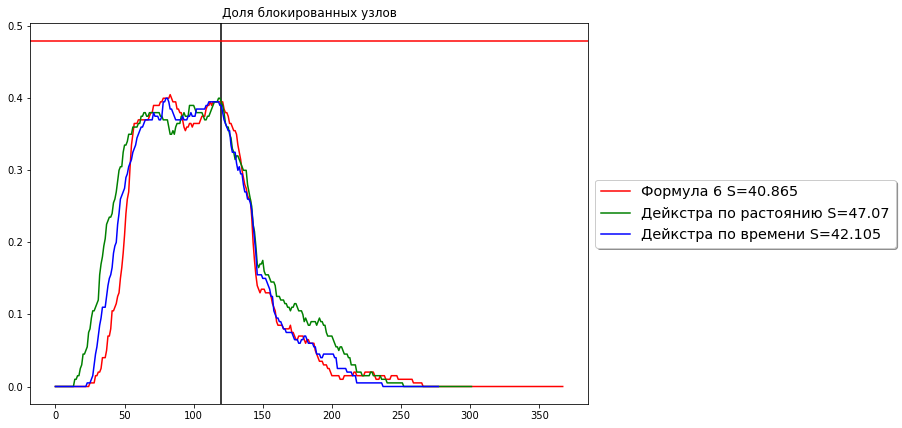

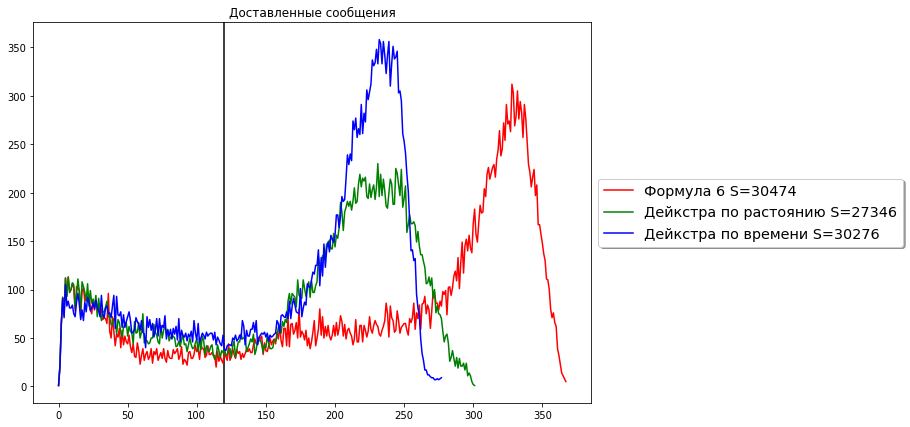

In [4]:
log_tags = [
 {"tag":  "9f54acfb-c1bd-4277-a895-5a554812f4c8", "label": "Формула 6", "color": "red"},
 {"tag":  "87bd0523-1c52-422e-a4aa-4cd6c9283295", "label": "Дейкстра по растоянию", "color": "green"},
 {"tag":  "03f0912f-fa6d-40c2-9bdd-5c9190e398f4", "label": "Дейкстра по времени", "color": "blue"},
]
showStat()
showStatBlocked();  
showStatMessage();